In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#  Packages & Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn as skl
import warnings
import statsmodels.api as sm

from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict, ShuffleSplit, validation_curve, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, RobustScaler, LabelEncoder, scale, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.feature_selection import RFE,SelectFromModel

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.datasets import make_classification

from xgboost import XGBClassifier 

from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter('ignore')


In [3]:
#Load Datasets
train_data = pd.read_csv("training_set_values.csv")
train_labels = pd.read_csv("training_set_labels.csv")
test_data = pd.read_csv("test_set_values.csv")


In [4]:
#Join Labels with Train data
train_labels = train_labels.drop(columns='id')
train_data = train_data.join(train_labels)


In [5]:
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [6]:
test_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
id                       14850 non-null int64
amount_tsh               14850 non-null float64
date_recorded            14850 non-null object
funder                   13981 non-null object
gps_height               14850 non-null int64
installer                13973 non-null object
longitude                14850 non-null float64
latitude                 14850 non-null float64
wpt_name                 14850 non-null object
num_private              14850 non-null int64
basin                    14850 non-null object
subvillage               14751 non-null object
region                   14850 non-null object
region_code              14850 non-null int64
district_code            14850 non-null int64
lga                      14850 non-null object
ward                     14850 non-null object
population               14850 non-null int64
public_meeting           14029 non-null object
r

In [9]:
#Drop id and recorded from train dataset 
train_data= train_data.drop(columns=['id'])
train_data= train_data.drop(columns=['recorded_by'])


In [10]:
#Drop id and recorded from test dataset 
test_data= test_data.drop(columns=['id'])
test_data= test_data.drop(columns=['recorded_by'])

In [11]:
# Differentiate categorical from numerical variables, even though some are encoded already,
num_train_data = train_data[[
# 'id',
'amount_tsh',
'gps_height',
'num_private',
'population',
]]

other_train_data = train_data[[ 
'longitude',
'latitude',
'date_recorded',
]]
    
categorical_columns = list(set(train_data.columns) - set(num_train_data.columns) - set(other_train_data.columns))
cat_train_data = train_data.loc[:,categorical_columns]


In [12]:
train_data.head()


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [13]:
train_data_missing = train_data.isna()
train_data_missing = (train_data_missing.sum()/len(train_data))*100
train_data_missing = train_data_missing[train_data_missing!=0]
train_data_missing

funder                6.119529
installer             6.153199
subvillage            0.624579
public_meeting        5.612795
scheme_management     6.526936
scheme_name          47.417508
permit                5.144781
dtype: float64

In [14]:
column_list = cat_train_data.columns.values.tolist()
print(column_list)

['water_quality', 'scheme_management', 'region', 'scheme_name', 'subvillage', 'construction_year', 'quality_group', 'public_meeting', 'quantity_group', 'waterpoint_type', 'basin', 'lga', 'installer', 'management', 'wpt_name', 'waterpoint_type_group', 'extraction_type_class', 'payment_type', 'funder', 'management_group', 'quantity', 'ward', 'source', 'permit', 'source_type', 'region_code', 'extraction_type_group', 'district_code', 'status_group', 'extraction_type', 'payment', 'source_class']


In [15]:
def unique_values(df):
    for column_name in column_list:
        return print(df[column_name].unique())

In [16]:
for column_name in column_list:
      print(column_name,len(train_data[column_name].unique()),train_data[column_name].unique())


water_quality 8 ['soft' 'salty' 'milky' 'unknown' 'fluoride' 'coloured' 'salty abandoned'
 'fluoride abandoned']
scheme_management 13 ['VWC' 'Other' nan 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None']
region 21 ['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']
scheme_name 2697 ['Roman' nan 'Nyumba ya mungu pipe scheme' ... 'BL Nsherehehe'
 'Magati  gravity spri' 'Mtawanya']
subvillage 19288 ['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']
construction_year 55 [1999 2010 2009 1986    0 2011 1987 1991 1978 1992 2008 1974 2000 2002
 2004 1972 2003 1980 2007 1973 1985 1970 1995 2006 1962 2005 1997 2012
 1996 1977 1983 1984 1990 1982 1976 1988 1989 1975 1960 1961 1998 1963
 1971 1994 1968 1993 2001 1979 1967 2013 1969 1981 1964 1966 1965]
quality_group 

In [17]:
#Fields that require intensive review are: installer, funder, scheme_name, ward, lga, wpt_name, subvillage
grouping_col = train_data[[
'installer',
'funder',
'scheme_name',
'ward',
'lga',
'wpt_name',
'subvillage'
]]

In [18]:
for i in grouping_col.columns:
    inspect = grouping_col[i].value_counts()/len(grouping_col)
    print(inspect.head(10))

DWE                   0.292963
Government            0.030724
RWE                   0.020303
Commu                 0.017845
DANIDA                0.017677
KKKT                  0.015118
Hesawa                0.014141
0                     0.013081
TCRS                  0.011902
Central government    0.010471
Name: installer, dtype: float64
Government Of Tanzania    0.152929
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
World Bank                0.022710
Kkkt                      0.021667
World Vision              0.020976
Unicef                    0.017795
Tasaf                     0.014764
District Council          0.014192
Name: funder, dtype: float64
K                              0.011481
None                           0.010842
Borehole                       0.009192
Chalinze wate                  0.006818
M                              0.006734
DANIDA                         0.006380
Government                     0.005387

#  Exploratory Data Analysis 

Text(0, 0.5, 'Percentage')

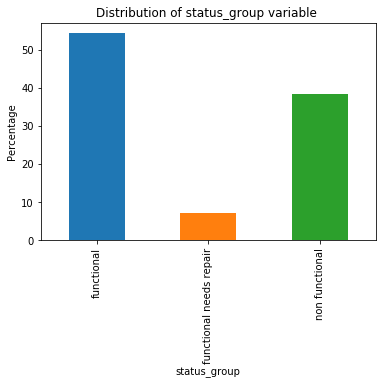

In [ ]:
plt.pyplot.show()
ax = ((train_data.status_group.value_counts().sort_index()/len(train_data))*100).plot(kind='bar')
plt.pyplot.title('Distribution of status_group variable ')
plt.pyplot.xlabel('status_group')
plt.pyplot.ylabel('Percentage')

In [ ]:
functional = len(train_data[train_data['status_group']=='functional'])
func_need_repair = len(train_data[train_data['status_group']=='functional needs repair'])
non_func = len(train_data[train_data['status_group']=='non functional'])

pct_functional = functional/(functional+func_need_repair+non_func)
print("percentage of functional is", pct_functional*100)
pct_func_need_repair = func_need_repair/(functional+func_need_repair+non_func)
print("percentage of functional needs repair", pct_func_need_repair*100)
pct_non_func = non_func/(functional+func_need_repair+non_func)
print("percentage of non functional", pct_non_func*100)

percentage of functional is 54.3080808080808
percentage of functional needs repair 7.267676767676767
percentage of non functional 38.42424242424242


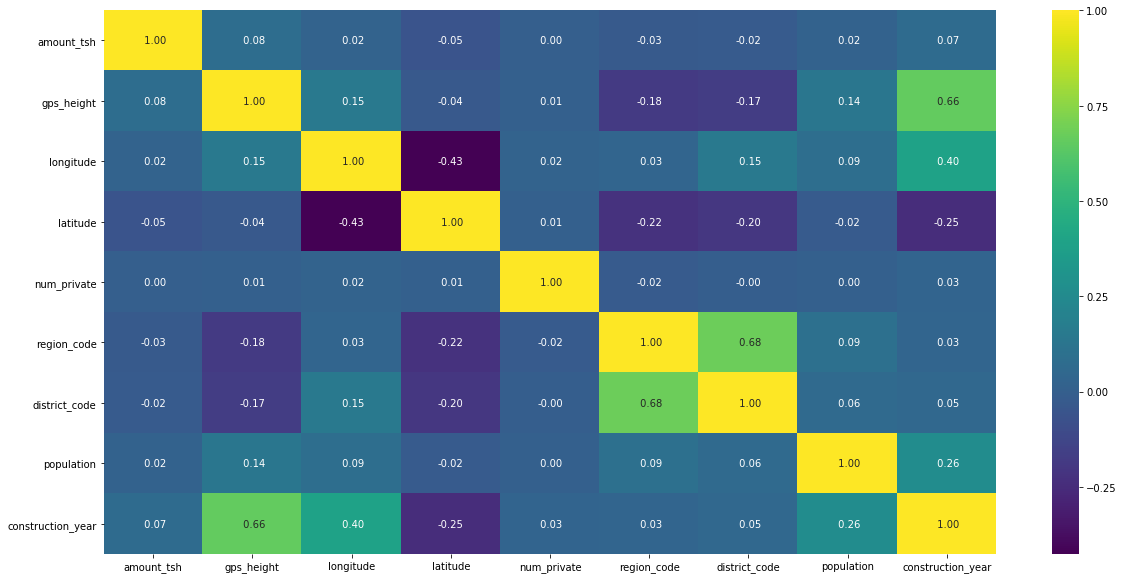

In [ ]:
plt.pyplot.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),cbar=True,fmt =' .2f', annot=True, cmap='viridis')

Text(0, 0.5, 'Percentage')

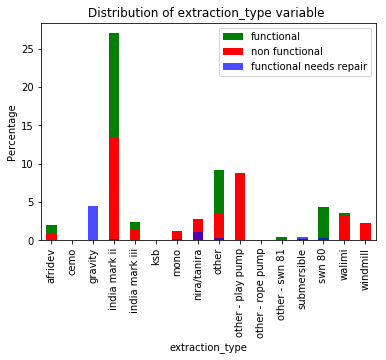

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].extraction_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='extraction_type')
((train_data[train_data.status_group=='non functional'].extraction_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='extraction_type')
((train_data[train_data.status_group=='functional needs repair'].extraction_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='extraction_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of extraction_type variable ')
plt.pyplot.xlabel('extraction_type')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

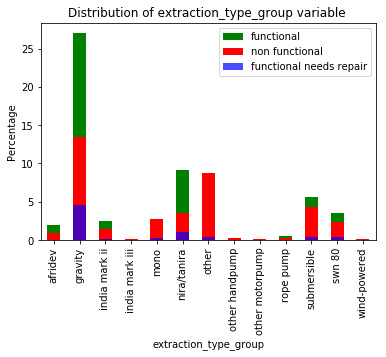

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].extraction_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='extraction_type_group')
((train_data[train_data.status_group=='non functional'].extraction_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='extraction_type_group')
((train_data[train_data.status_group=='functional needs repair'].extraction_type_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='extraction_type_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of extraction_type_group variable ')
plt.pyplot.xlabel('extraction_type_group')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

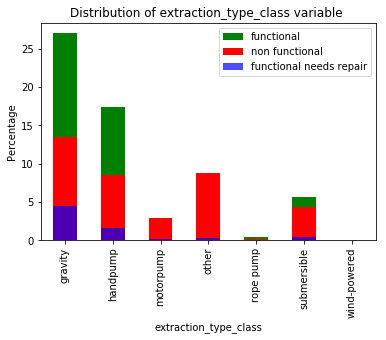

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].extraction_type_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='extraction_type_class')
((train_data[train_data.status_group=='non functional'].extraction_type_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='extraction_type_class')
((train_data[train_data.status_group=='functional needs repair'].extraction_type_class.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='extraction_type_class')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of extraction_type_class variable ')
plt.pyplot.xlabel('extraction_type_class')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

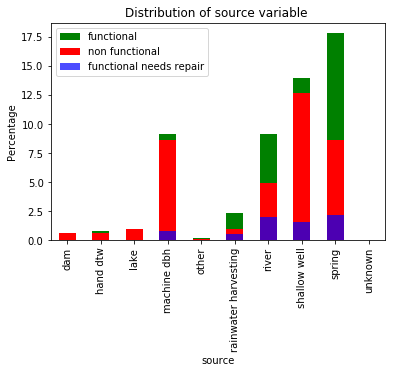

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].source.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='source')
((train_data[train_data.status_group=='non functional'].source.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='source')
((train_data[train_data.status_group=='functional needs repair'].source.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='source')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of source variable ')
plt.pyplot.xlabel('source')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

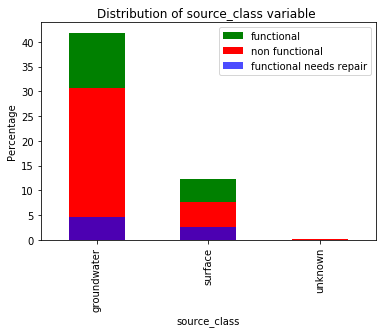

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].source_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='source_class')
((train_data[train_data.status_group=='non functional'].source_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='source_class')
((train_data[train_data.status_group=='functional needs repair'].source_class.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='source_class')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of source_class variable ')
plt.pyplot.xlabel('source_class')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

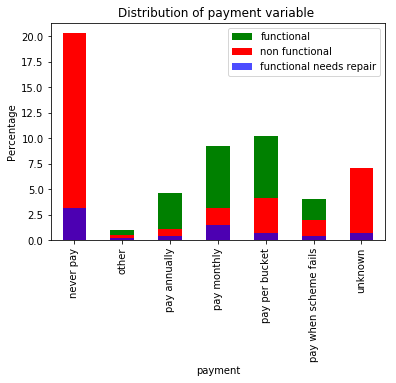

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].payment.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='payment')
((train_data[train_data.status_group=='non functional'].payment.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='payment')
((train_data[train_data.status_group=='functional needs repair'].payment.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='payment')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of payment variable ')
plt.pyplot.xlabel('payment')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

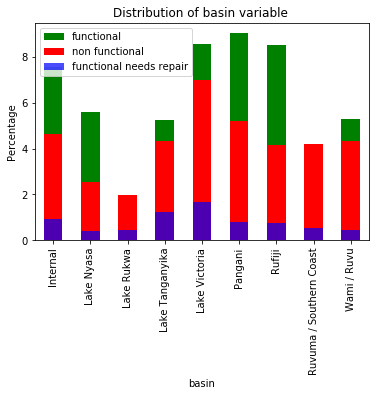

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].basin.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='basin')
((train_data[train_data.status_group=='non functional'].basin.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='basin')
((train_data[train_data.status_group=='functional needs repair'].basin.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='basin')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of basin variable ')
plt.pyplot.xlabel('basin')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

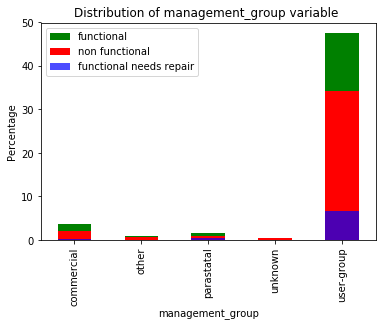

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].management_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='management_group')
((train_data[train_data.status_group=='non functional'].management_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='management_group')
((train_data[train_data.status_group=='functional needs repair'].management_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='management_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of management_group variable ')
plt.pyplot.xlabel('management_group')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

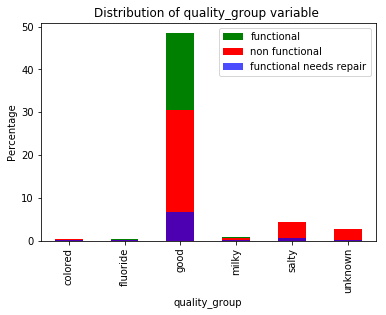

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='quality_group')
((train_data[train_data.status_group=='non functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='quality_group')
((train_data[train_data.status_group=='functional needs repair'].quality_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='quality_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of quality_group variable ')
plt.pyplot.xlabel('quality_group')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

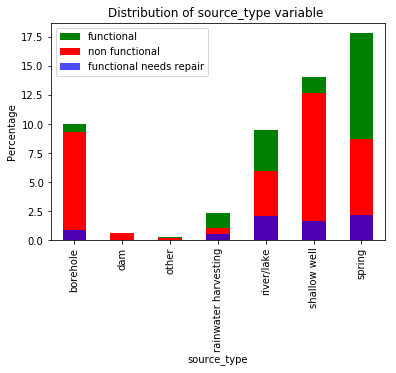

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].source_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='source_type')
((train_data[train_data.status_group=='non functional'].source_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='source_type')
((train_data[train_data.status_group=='functional needs repair'].source_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='source_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of source_type variable ')
plt.pyplot.xlabel('source_type')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

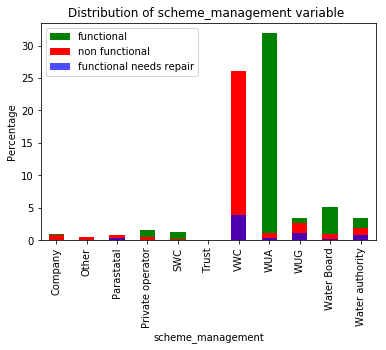

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].scheme_management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='scheme_management')
((train_data[train_data.status_group=='non functional'].scheme_management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='scheme_management')
((train_data[train_data.status_group=='functional needs repair'].scheme_management.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='scheme_management')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of scheme_management variable ')
plt.pyplot.xlabel('scheme_management')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

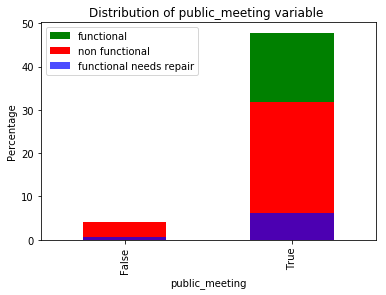

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].public_meeting.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='public_meeting')
((train_data[train_data.status_group=='non functional'].public_meeting.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='public_meeting')
((train_data[train_data.status_group=='functional needs repair'].public_meeting.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='public_meeting')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of public_meeting variable ')
plt.pyplot.xlabel('public_meeting')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

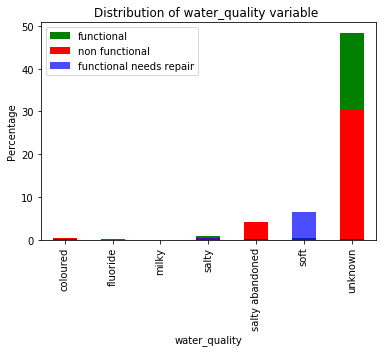

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].water_quality.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='water_quality')
((train_data[train_data.status_group=='non functional'].water_quality.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='water_quality')
((train_data[train_data.status_group=='functional needs repair'].water_quality.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='water_quality')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of water_quality variable ')
plt.pyplot.xlabel('water_quality')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

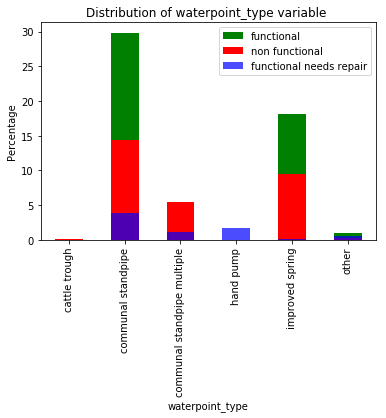

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].waterpoint_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='waterpoint_type')
((train_data[train_data.status_group=='non functional'].waterpoint_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='waterpoint_type')
((train_data[train_data.status_group=='functional needs repair'].waterpoint_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='waterpoint_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of waterpoint_type variable ')
plt.pyplot.xlabel('waterpoint_type')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

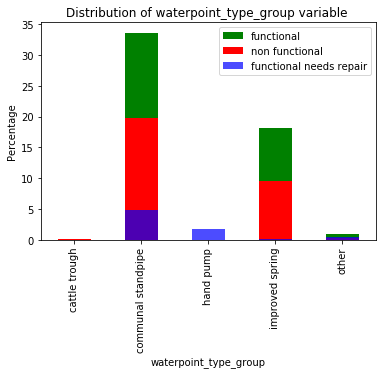

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].waterpoint_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='waterpoint_type_group')
((train_data[train_data.status_group=='non functional'].waterpoint_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='waterpoint_type_group')
((train_data[train_data.status_group=='functional needs repair'].waterpoint_type_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='waterpoint_type_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of waterpoint_type_group variable ')
plt.pyplot.xlabel('waterpoint_type_group')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

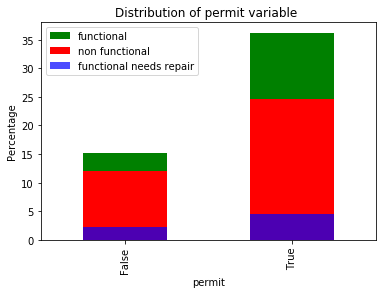

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].permit.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='permit')
((train_data[train_data.status_group=='non functional'].permit.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='permit')
((train_data[train_data.status_group=='functional needs repair'].permit.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='permit')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of permit variable ')
plt.pyplot.xlabel('permit')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

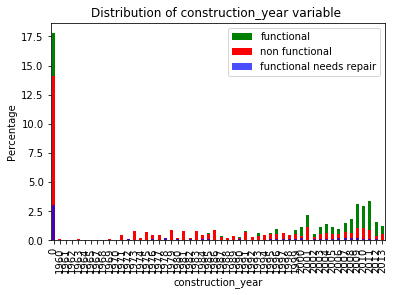

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].construction_year.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='construction_year')
((train_data[train_data.status_group=='non functional'].construction_year.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='construction_year')
((train_data[train_data.status_group=='functional needs repair'].construction_year.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='construction_year')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of construction_year variable ')
plt.pyplot.xlabel('construction_year')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

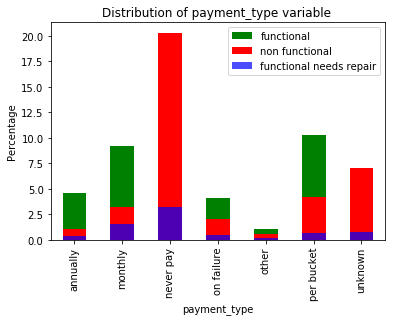

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].payment_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='payment_type')
((train_data[train_data.status_group=='non functional'].payment_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='payment_type')
((train_data[train_data.status_group=='functional needs repair'].payment_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='payment_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of payment_type variable ')
plt.pyplot.xlabel('payment_type')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

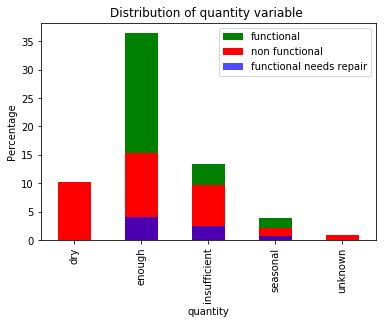

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].quantity.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='quantity')
((train_data[train_data.status_group=='non functional'].quantity.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='quantity')
((train_data[train_data.status_group=='functional needs repair'].quantity.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='quantity')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of quantity variable ')
plt.pyplot.xlabel('quantity')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

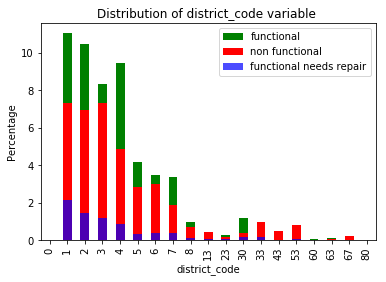

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].district_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='district_code')
((train_data[train_data.status_group=='non functional'].district_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='district_code')
((train_data[train_data.status_group=='functional needs repair'].district_code.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='district_code')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of district_code variable ')
plt.pyplot.xlabel('district_code')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

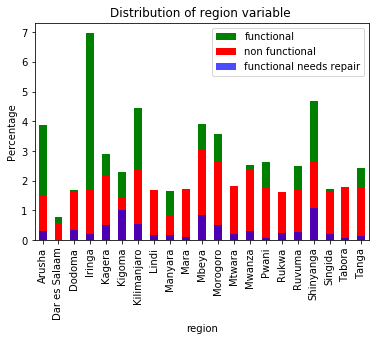

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].region.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='region')
((train_data[train_data.status_group=='non functional'].region.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='region')
((train_data[train_data.status_group=='functional needs repair'].region.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='region')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of region variable ')
plt.pyplot.xlabel('region')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

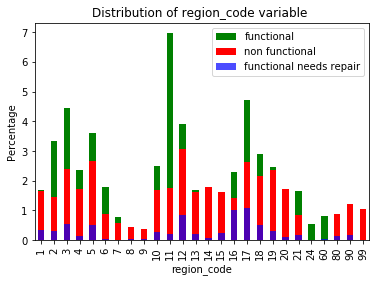

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].region_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='region_code')
((train_data[train_data.status_group=='non functional'].region_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='region_code')
((train_data[train_data.status_group=='functional needs repair'].region_code.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='region_code')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of region_code variable ')
plt.pyplot.xlabel('region_code')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

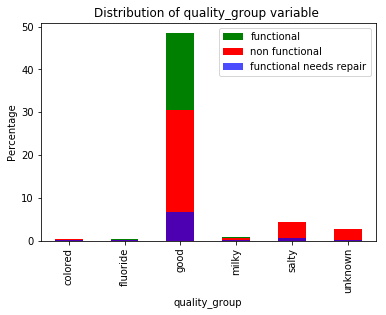

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='quality_group')
((train_data[train_data.status_group=='non functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='quality_group')
((train_data[train_data.status_group=='functional needs repair'].quality_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='quality_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of quality_group variable ')
plt.pyplot.xlabel('quality_group')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

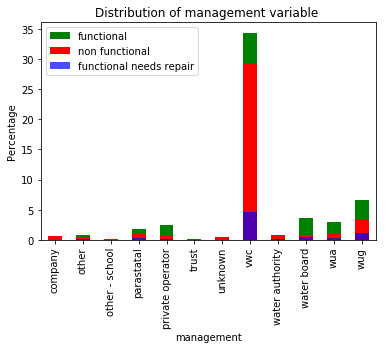

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='management')
((train_data[train_data.status_group=='non functional'].management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='management')
((train_data[train_data.status_group=='functional needs repair'].management.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='management')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of management variable ')
plt.pyplot.xlabel('management')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

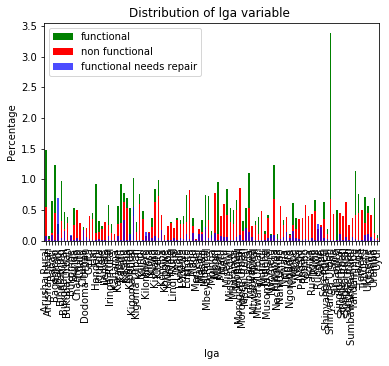

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].lga.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='lga')
((train_data[train_data.status_group=='non functional'].lga.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='lga')
((train_data[train_data.status_group=='functional needs repair'].lga.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='lga')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of lga variable ')
plt.pyplot.xlabel('lga')
plt.pyplot.ylabel('Percentage')

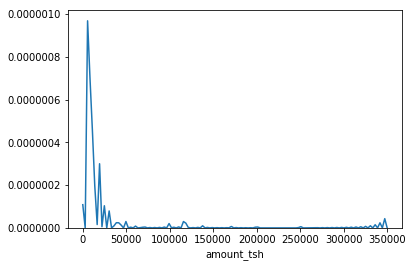

In [ ]:
sns.distplot(train_data['amount_tsh'], hist = False, kde = True)


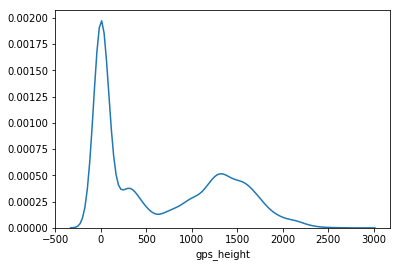

In [ ]:
sns.distplot(train_data['gps_height'], hist = False, kde = True)

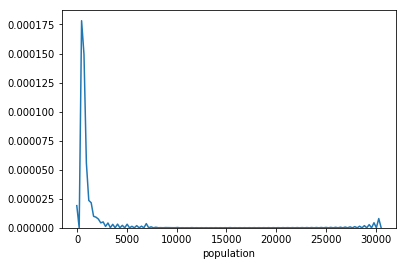

In [ ]:
sns.distplot(train_data['population'], hist = False, kde = True)

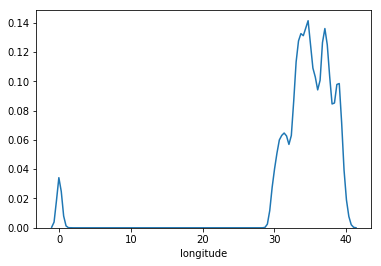

In [ ]:
sns.distplot(train_data['longitude'], hist = False, kde = True)

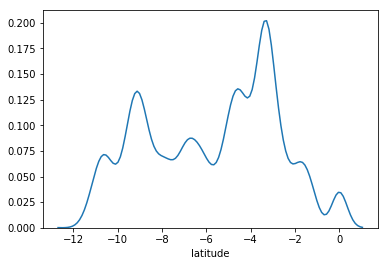

In [ ]:
sns.distplot(train_data['latitude'], hist = False, kde = True)

In [ ]:
sns.pairplot(train_data, hue="status_group")